<a href="https://colab.research.google.com/github/Pornwalaifoxall/Datawarehouse/blob/main/Data_Preprocessing_67.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing
### Data Preprocessing, Data Visualization, Data Analysis

ชื่อ:
พรวลัย ฟ็อกซ์ออล 653020573-2

กำหนดส่ง: อาทิตย์ 8 กันยายน 2567 (NO EXTENSION!)

**ผลที่คาดหวังจากการทำงานนี้**
* สามารถใช้ Python ในการอ่านข้อมูล
* จัดการกับข้อมูลเบื้องต้นก่อนนำไปวิเคราะห์
* สามารถวิเคราะห์ข้อมูลเบื้องต้นด้วยการสร้าง Data Visualization และ Pivot Tables

**สิ่งที่ต้องมีในการทำงานนี้**
* มีการติดตั้ง Python ในเครื่องคอมพิวเตอร์

**Python libraries ที่ใช้ในงานนี้:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)

** NOTE **
* อย่าลืมบันทึกงานที่ทำในโน้ตบุ๊คนี้เป็นประจำขณะทำงาน มิเช่นนั้นงานที่ทำอยู่อาจสูญหายได้
* **เริ่มทำแต่เนิ่น ๆ อย่ารอที่จะทำก่อนส่ง เพราะจะทำไม่เสร็จ เนื่องจากปัญหามากมายที่จะเกิดขึ้นระหว่างการทำงาน และอาจารย์ไม่รับปรึกษาในคืนก่อนส่ง**
----------------------

In [305]:
"""
หากไม่สามารถลง library ใด ให้ดาวน์โหลดดังตัวอย่างต่อไปนี้
!pip3 install numpy
"""
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [306]:
"""
# reading data sets from Google Drive
from google.colab import drive
drive.mount('/content/drive')
"""

"\n# reading data sets from Google Drive\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

## Titanic Data Set
* (10 points) ข้อมูล Titanic เป็นหนึ่งในชุดข้อมูลที่ได้รับความนิยมมากที่สุดในแวดวงการเรียนรู้การวิเคราะห์ข้อมูลและการสร้างโมเดลทางสถิติหรือการเรียนรู้ของเครื่อง (Machine Learning) ชุดข้อมูลนี้มาจากเหตุการณ์เรือ Titanic ซึ่งเป็นเรือสำราญที่ใหญ่ที่สุดในยุคนั้น และเกิดอับปางในปี 1912 ทำให้มีผู้เสียชีวิตจำนวนมาก
    ข้อมูลนี้ประกอบด้วยรายละเอียดของผู้โดยสารบนเรือ Titanic เช่น อายุ เพศ ชั้นที่นั่ง (Pclass) ค่าโดยสาร (Fare) จำนวนญาติพี่น้องหรือคู่สมรสบนเรือ (SibSp) และสถานที่ขึ้นเรือ (Embarked) โดยมีเป้าหมายหลักในการวิเคราะห์หรือการสร้างโมเดลคือการทำนายว่าผู้โดยสารคนนั้นจะรอดชีวิต (Survived) หรือไม่จากการอับปางของเรือ Titanic \
    https://www.kaggle.com/datasets/vinicius150987/titanic3/data

<center><img src="https://www.pigeonforgetncabins.com/wp-content/uploads/2015/06/experience-at-titanic-pigeon-forge.jpg" alt="titanic" width="400"/></center>

In [376]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [377]:
titanic = pd.read_excel('/content/drive/MyDrive/Data Warehouse/titanic3.xls')

In [378]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


* (10 points) จากข้อมูลที่ให้มา มีค่าว่างสูญหายมากน้อยแค่ไหน? และมีค่าผิดปกติ (outliers) และหรือข้อมูลรบกวน (noisy data) หรือไม่ในแต่ละตัวแปร?

In [379]:
# ตรวจสอบค่าว่าง
titanic.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


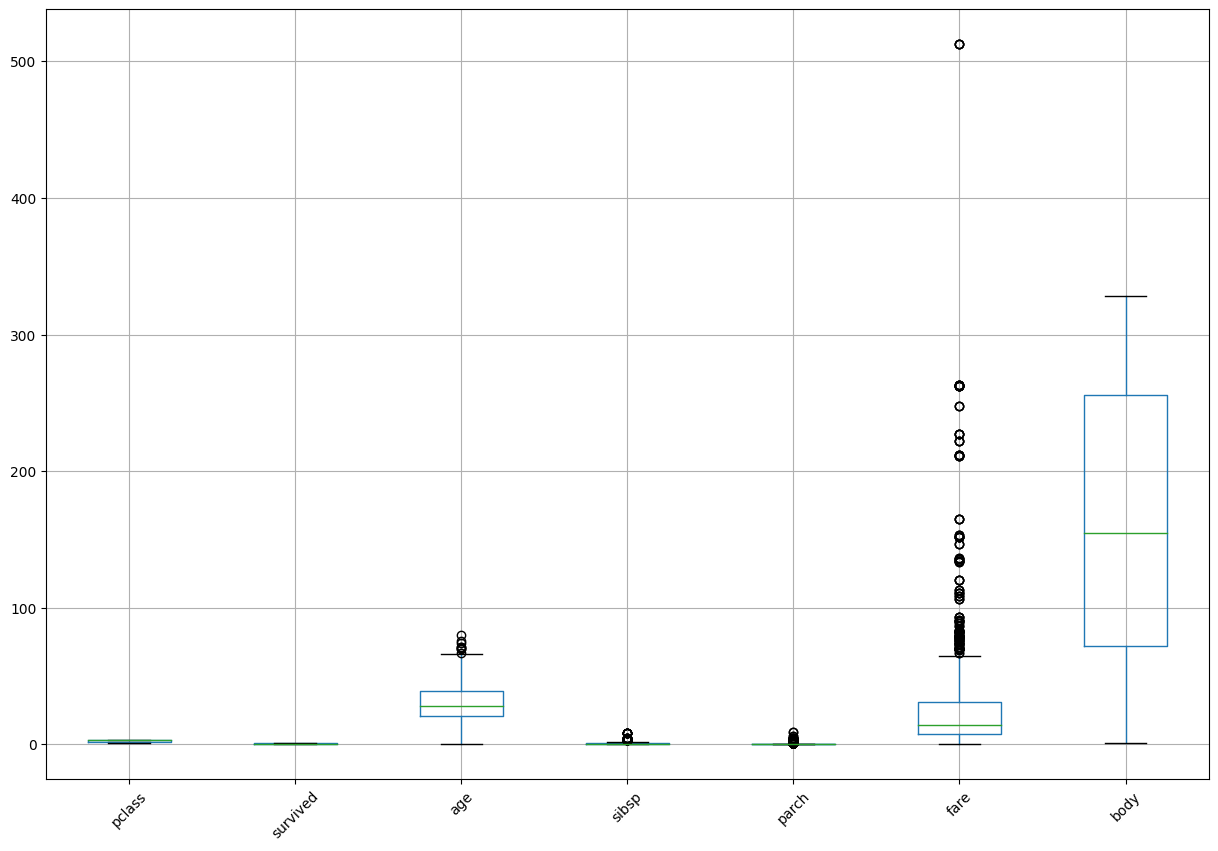

In [380]:
# ตรวจสอบค่าผิดปกติ (Outliers) ด้วย Box Plot
plt.figure(figsize=(15, 10))
titanic.boxplot()
plt.xticks(rotation=45)
plt.show()

จาก Boxplot ตัวแปร Fare มีค่าผิดปกติหลายค่าที่เป็นราคาที่สูงกว่าปกติ ค่ากลาง(median) ค่อนข้างต่ำ แต่ยังมีการกระจายที่สูงสำหรับค่าราคา ซึ่งจากราฟนี้จะพบว่าตัวแปรที่มีค่าผิดปกติ (outlier) คือ Fare sibsp age parch

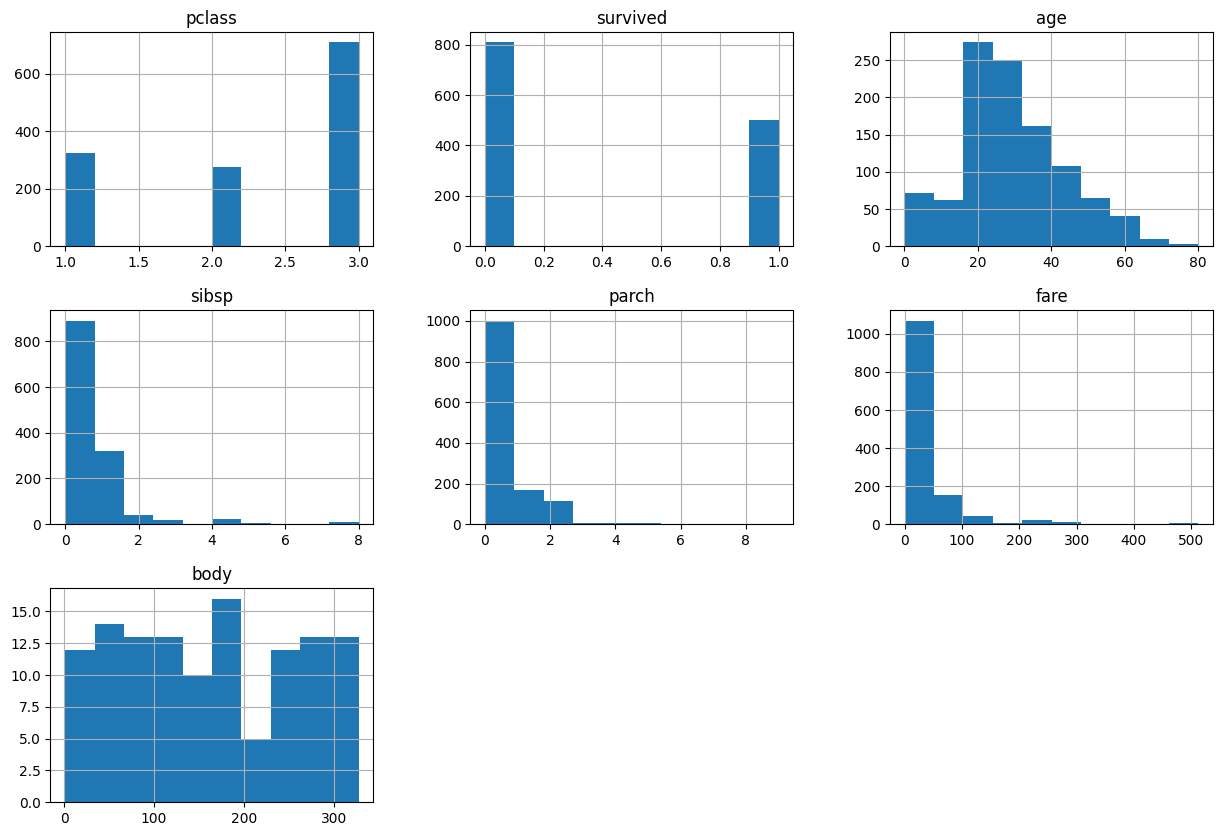

In [381]:
# ตรวจสอบค่าผิดปกติ (Outliers) ด้วย Histograms
titanic.hist(figsize=(15, 10))
plt.show()

* (10 points) จากข้อมูลที่ให้มา เตรียมข้อมูลให้พร้อมโดยการจัดการกับค่าว่างในข้อมูล ให้อธิบายวิธีที่ท่านเลือกใช้ พร้อมยกเหตุผลประกอบ

วิธีเติมค่าว่างใน columns age ด้วยค่า mean ของอายุทั้งหมด เนื่องจากว่าเป็นวิธีที่สามารถช่วยรักษาค่าเฉลี่ยและการกระจายตัวของข้อมูลใน columns age การใช้ค่าเฉลี่ยเป็นประโยชน์ในกรณีที่ต้องการรักษาลักษณะการกระจายตัวของข้อมูลให้ใกล้เคียงกับข้อมูลจริง โดยการใช้ค่าที่เป็นตัวแทนของอายุในข้อมูล

In [382]:
# เติมค่าว่างใน Age ด้วยค่าเฉลี่ย
titanic['age'].fillna(titanic['age'].mean(), inplace=True)

วิธีเติมค่าว่างใน columns fare ด้วยค่า mean เช่นเดียวกับ columns age การใช้ค่าเฉลี่ยในการแทนที่ค่าว่างใน columns fare เป็นวิธีที่ช่วยรักษาค่าเฉลี่ยและการกระจายตัวของข้อมูลทั้งหมด การใช้ค่าเฉลี่ยจะลดผลกระทบจากค่าผิดปกติที่อาจเกิดขึ้น

In [383]:
# เติมค่าว่างใน Fare ด้วยค่าเฉลี่ย
titanic['fare'].fillna(titanic['fare'].mean(), inplace=True)

วิธีเติมค่าว่างใน columns embarked ด้วยค่า mode เนื่องจากว่าเป็นข้อมูลประเภท categorical data ซึ่งการแทนค่าด้วยค่า mode เหมาะสมที่สึดสำหรับข้อมูลประเภทนี้ เนื่องจากว่าการใช้ค่า mode จะรักษาความถี่และความสมดุล

In [384]:
# เติมค่าว่างใน Embarked ด้วยค่าที่ mode
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

In [385]:
titanic['cabin'].fillna("Unknown" , inplace=True)

titanic['boat'].fillna("Unknown" , inplace=True)

titanic['body'].fillna("Unknown" , inplace=True)

titanic['home.dest'].fillna("Unknown" , inplace=True)

<ipython-input-385-2585f6d1c884>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  titanic['body'].fillna("Unknown" , inplace=True)


In [386]:
# ตรวจสอบค่าว่างหลังจากการ clean data แล้ว
titanic.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
cabin,0


* แปลงข้อมูลเชิงคุณภาพให้เป็นตัวเลข \
    i. (10 points) ใช้ one-hot encoding ในการแปลงตัวแปร Embarked \
    ii. (10 points) แปลงตัวแปร Sex โดยให้เพศชายเป็น 0 และเพศหญิงเป็น 1 \
    iii. (10 points) สร้างตัวแปร FamilySize ซึ่งเป็นผลรวมของตัวแปร SibSp (number of siblings/spouses aboard) และ Parch (number of parents/children aboard) \
    iv. (10 points) สร้างตัวแปร IsAlone ซึ่งมีค่าเป็น 1 ถ้า FamilySize เป็น 0, และมีค่าเป็นศูนย์เมื่อเป็นอื่น

In [387]:
# แปลงข้อมูลเชิงคุณภาพให้เป็นตัวเลข ใช้ one-hot encoding ในการแปลงตัวแปร Embarked
embarked_onehot = pd.get_dummies(titanic['embarked'], prefix='embarked')
titanic = pd.concat([titanic, embarked_onehot], axis=1)
titanic.drop('embarked', axis=1, inplace=True)
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,embarked_C,embarked_Q,embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,2,Unknown,"St Louis, MO",False,False,True
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,C22 C26,11,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,Unknown,135.0,"Montreal, PQ / Chesterville, ON",False,False,True
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,Unknown,Unknown,328.0,Unknown,True,False,False
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,Unknown,Unknown,Unknown,Unknown,True,False,False
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,Unknown,Unknown,304.0,Unknown,True,False,False
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,Unknown,Unknown,Unknown,Unknown,True,False,False


In [388]:
# แปลงตัวแปร Sex โดยให้เพศชายเป็น 0 และเพศหญิงเป็น 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,embarked_C,embarked_Q,embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.000000,0,0,24160,211.3375,B5,2,Unknown,"St Louis, MO",False,False,True
1,1,1,"Allison, Master. Hudson Trevor",0,0.916700,1,2,113781,151.5500,C22 C26,11,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True
2,1,0,"Allison, Miss. Helen Loraine",1,2.000000,1,2,113781,151.5500,C22 C26,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.000000,1,2,113781,151.5500,C22 C26,Unknown,135.0,"Montreal, PQ / Chesterville, ON",False,False,True
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.000000,1,2,113781,151.5500,C22 C26,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.500000,1,0,2665,14.4542,Unknown,Unknown,328.0,Unknown,True,False,False
1305,3,0,"Zabour, Miss. Thamine",1,29.881135,1,0,2665,14.4542,Unknown,Unknown,Unknown,Unknown,True,False,False
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.500000,0,0,2656,7.2250,Unknown,Unknown,304.0,Unknown,True,False,False
1307,3,0,"Zakarian, Mr. Ortin",0,27.000000,0,0,2670,7.2250,Unknown,Unknown,Unknown,Unknown,True,False,False


In [389]:
# สร้างตัวแปร FamilySize ซึ่งเป็นผลรวมของตัวแปร SibSp และ Parch
titanic['FamilySize'] = titanic['sibsp'] + titanic['parch']
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,embarked_C,embarked_Q,embarked_S,FamilySize
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.000000,0,0,24160,211.3375,B5,2,Unknown,"St Louis, MO",False,False,True,0
1,1,1,"Allison, Master. Hudson Trevor",0,0.916700,1,2,113781,151.5500,C22 C26,11,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3
2,1,0,"Allison, Miss. Helen Loraine",1,2.000000,1,2,113781,151.5500,C22 C26,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.000000,1,2,113781,151.5500,C22 C26,Unknown,135.0,"Montreal, PQ / Chesterville, ON",False,False,True,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.000000,1,2,113781,151.5500,C22 C26,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.500000,1,0,2665,14.4542,Unknown,Unknown,328.0,Unknown,True,False,False,1
1305,3,0,"Zabour, Miss. Thamine",1,29.881135,1,0,2665,14.4542,Unknown,Unknown,Unknown,Unknown,True,False,False,1
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.500000,0,0,2656,7.2250,Unknown,Unknown,304.0,Unknown,True,False,False,0
1307,3,0,"Zakarian, Mr. Ortin",0,27.000000,0,0,2670,7.2250,Unknown,Unknown,Unknown,Unknown,True,False,False,0


In [390]:
# สร้างตัวแปร IsAlone ซึ่งมีค่าเป็น 1 ถ้า FamilySize เป็น 0, และมีค่าเป็นศูนย์เมื่อเป็นอื่น
titanic['IsAlone'] = np.where(titanic['FamilySize'] == 0, 1, 0)
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,embarked_C,embarked_Q,embarked_S,FamilySize,IsAlone
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.000000,0,0,24160,211.3375,B5,2,Unknown,"St Louis, MO",False,False,True,0,1
1,1,1,"Allison, Master. Hudson Trevor",0,0.916700,1,2,113781,151.5500,C22 C26,11,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0
2,1,0,"Allison, Miss. Helen Loraine",1,2.000000,1,2,113781,151.5500,C22 C26,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.000000,1,2,113781,151.5500,C22 C26,Unknown,135.0,"Montreal, PQ / Chesterville, ON",False,False,True,3,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.000000,1,2,113781,151.5500,C22 C26,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.500000,1,0,2665,14.4542,Unknown,Unknown,328.0,Unknown,True,False,False,1,0
1305,3,0,"Zabour, Miss. Thamine",1,29.881135,1,0,2665,14.4542,Unknown,Unknown,Unknown,Unknown,True,False,False,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.500000,0,0,2656,7.2250,Unknown,Unknown,304.0,Unknown,True,False,False,0,1
1307,3,0,"Zakarian, Mr. Ortin",0,27.000000,0,0,2670,7.2250,Unknown,Unknown,Unknown,Unknown,True,False,False,0,1


* ทำการ Normalize ข้อมูล \
    i. (10 points) ตัวแปร Fare และ Age ใช้ Min-Max Scaling \
    ii. (10 points) สร้างตัวแปรใหม่ Fare_Per_Person ด้วยการนำตัวแปร Fare มาหารด้วย FamilySize + 1 \
    iii. (10 points) สร้างตัวแปร AgeGroup ที่ระบุกลุ่มอายุของตัวอย่าง โดยแบ่งเป็นกลุ่มดังนี้ [0, 12), [12, 18), [18, 50) และ [50, 100)

In [371]:
import pandas as pd
import numpy as np
pd.cut(np.array([1,7,5,4,6,3]),3)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [372]:
pd.cut(np.array([1,7,5,4,6,3]),[0,2,5,8])

[(0, 2], (5, 8], (2, 5], (2, 5], (5, 8], (2, 5]]
Categories (3, interval[int64, right]): [(0, 2] < (2, 5] < (5, 8]]

In [393]:
#ตัวแปร Fare และ Age ใช้ Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
# สร้าง MinMaxScaler object
scaler = MinMaxScaler()
# Normalize Fare และ Age
titanic[['fare', 'age']] = scaler.fit_transform(titanic[['fare', 'age']])
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,embarked_C,embarked_Q,embarked_S,FamilySize,IsAlone,AgeGroup
0,1,1,"Allen, Miss. Elisabeth Walton",1,0.361169,0,0,24160,0.412503,B5,2,Unknown,"St Louis, MO",False,False,True,0,1,"[18, 50)"
1,1,1,"Allison, Master. Hudson Trevor",0,0.009395,1,2,113781,0.295806,C22 C26,11,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,"[0, 12)"
2,1,0,"Allison, Miss. Helen Loraine",1,0.022964,1,2,113781,0.295806,C22 C26,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,"[0, 12)"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,0.373695,1,2,113781,0.295806,C22 C26,Unknown,135.0,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,"[18, 50)"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0.311064,1,2,113781,0.295806,C22 C26,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,"[18, 50)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,0.179540,1,0,2665,0.028213,Unknown,Unknown,328.0,Unknown,True,False,False,1,0,"[12, 18)"
1305,3,0,"Zabour, Miss. Thamine",1,0.372206,1,0,2665,0.028213,Unknown,Unknown,Unknown,Unknown,True,False,False,1,0,"[18, 50)"
1306,3,0,"Zakarian, Mr. Mapriededer",0,0.329854,0,0,2656,0.014102,Unknown,Unknown,304.0,Unknown,True,False,False,0,1,"[18, 50)"
1307,3,0,"Zakarian, Mr. Ortin",0,0.336117,0,0,2670,0.014102,Unknown,Unknown,Unknown,Unknown,True,False,False,0,1,"[18, 50)"


In [392]:
# สร้างตัวแปร AgeGroup ที่ระบุกลุ่มอายุของตัวอย่าง โดยแบ่งเป็นกลุ่มดังนี้ [0, 12), [12, 18), [18, 50) และ [50, 100)
titanic['AgeGroup'] = pd.cut(titanic['age'], bins=[0, 12, 18, 50, 100], labels=['[0, 12)', '[12, 18)', '[18, 50)' ,'[50, 100)'])
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,embarked_C,embarked_Q,embarked_S,FamilySize,IsAlone,AgeGroup
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.000000,0,0,24160,211.3375,B5,2,Unknown,"St Louis, MO",False,False,True,0,1,"[18, 50)"
1,1,1,"Allison, Master. Hudson Trevor",0,0.916700,1,2,113781,151.5500,C22 C26,11,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,"[0, 12)"
2,1,0,"Allison, Miss. Helen Loraine",1,2.000000,1,2,113781,151.5500,C22 C26,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,"[0, 12)"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.000000,1,2,113781,151.5500,C22 C26,Unknown,135.0,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,"[18, 50)"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.000000,1,2,113781,151.5500,C22 C26,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,"[18, 50)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.500000,1,0,2665,14.4542,Unknown,Unknown,328.0,Unknown,True,False,False,1,0,"[12, 18)"
1305,3,0,"Zabour, Miss. Thamine",1,29.881135,1,0,2665,14.4542,Unknown,Unknown,Unknown,Unknown,True,False,False,1,0,"[18, 50)"
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.500000,0,0,2656,7.2250,Unknown,Unknown,304.0,Unknown,True,False,False,0,1,"[18, 50)"
1307,3,0,"Zakarian, Mr. Ortin",0,27.000000,0,0,2670,7.2250,Unknown,Unknown,Unknown,Unknown,True,False,False,0,1,"[18, 50)"


In [394]:
# สร้างตัวแปรใหม่ Fare_Per_Person ด้วยการนำตัวแปร Fare มาหารด้วย FamilySize + 1
titanic['Fare_Per_Person'] = titanic['fare'] / (titanic['FamilySize'] + 1)
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,embarked_C,embarked_Q,embarked_S,FamilySize,IsAlone,AgeGroup,Fare_Per_Person
0,1,1,"Allen, Miss. Elisabeth Walton",1,0.361169,0,0,24160,0.412503,B5,2,Unknown,"St Louis, MO",False,False,True,0,1,"[18, 50)",0.412503
1,1,1,"Allison, Master. Hudson Trevor",0,0.009395,1,2,113781,0.295806,C22 C26,11,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,"[0, 12)",0.073951
2,1,0,"Allison, Miss. Helen Loraine",1,0.022964,1,2,113781,0.295806,C22 C26,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,"[0, 12)",0.073951
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,0.373695,1,2,113781,0.295806,C22 C26,Unknown,135.0,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,"[18, 50)",0.073951
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0.311064,1,2,113781,0.295806,C22 C26,Unknown,Unknown,"Montreal, PQ / Chesterville, ON",False,False,True,3,0,"[18, 50)",0.073951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,0.179540,1,0,2665,0.028213,Unknown,Unknown,328.0,Unknown,True,False,False,1,0,"[12, 18)",0.014106
1305,3,0,"Zabour, Miss. Thamine",1,0.372206,1,0,2665,0.028213,Unknown,Unknown,Unknown,Unknown,True,False,False,1,0,"[18, 50)",0.014106
1306,3,0,"Zakarian, Mr. Mapriededer",0,0.329854,0,0,2656,0.014102,Unknown,Unknown,304.0,Unknown,True,False,False,0,1,"[18, 50)",0.014102
1307,3,0,"Zakarian, Mr. Ortin",0,0.336117,0,0,2670,0.014102,Unknown,Unknown,Unknown,Unknown,True,False,False,0,1,"[18, 50)",0.014102


* (10 points) นำเสนอการแจกแจงหรือทำความเข้าใจตัวแปรสำคัญในข้อมูล เช่น Age, Fare, and Pclass ด้วยการสร้างฮิสโตแกรมหรือแผนภาพกล่อง

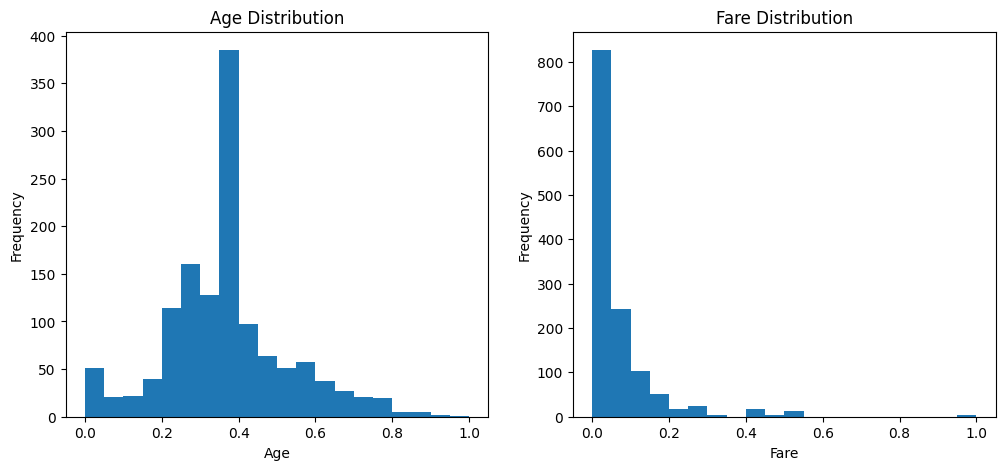

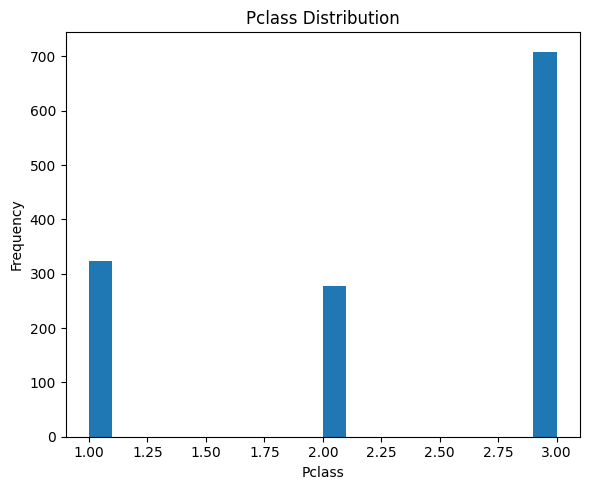

In [395]:
# Histograms for Age, Fare
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(titanic['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
plt.hist(titanic['fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution')

# Create a new figure with one subplot for 'pclass'
plt.figure(figsize=(6, 5))
plt.hist(titanic['pclass'], bins=20)
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.title('Pclass Distribution')

plt.tight_layout()
plt.show()

## จากกราฟ Histrogram ทั้ง 3 กราฟสามารถสรุปผลได้ดังนี้
### กราฟการกระจายตัวของอายุ (Age Distribution)
มีลักษณะการกระจายแบบไม่สมมาตร โดยมีผู้โดยสารจำนวนมากในช่วงอายุกลาง และค่อยๆลดลงในช่วงอายุที่สูงขึ้น

### กราฟการกระจายตัวของค่าโดยสาร (Fare Distribution)
มีลักษณะการกระจายตัวแบบเบ้ขวาซึ่งหมายถึงมีผู้โดยสารจำนวนมากที่จ่ายค่าโดยสารต่ำ ในขณะที่มีเพียงไม่กี่คนที่จ่ายค่าโดยสารสูง

### กราฟกระจายตัวของระดับชั้นของผู้โดยสาร (Pclass Distribution)
แสดงให้เห็นว่าผู้โดยสารส่วนใหญ่อยู่ในชั้นที่ 3 ซึ่งมีความเป็นไปได้ว่าชั้นที่ 3 มีค่าใช้จ่ายต่ำที่สุด ส่วนผู้โดยสารในชั้นที่ 1 และชั้นที่ 2 มีจำนวนน้อยกว่าชั้นที่ 3 และใกล้เคียงกัน


* เมื่อเตรียมข้อมูลพร้อมแล้ว ให้หาความสัมพันธ์ของตัวแปรต่อไปนี้จากข้อมูล ซึ่งอาจนำเสนอด้วยสถิติและแผนภูมิหรือกราฟก็ได้: \
    i. (10 points) survived และ pclass \
    ii. (10 points) survived และ sex \
    iii. (10 points) survived และ age \
    iv. (10 points) จำนวนสมาชิกครอบครัวที่รอดชีวิต และ Fare

In [396]:
# สร้างตาราง Pivot Table เพื่อดูความสัมพันธ์ระหว่าง survived และ pclass
pivot_table = pd.pivot_table(titanic, values='survived', index='pclass', aggfunc=np.mean)
pivot_table

<ipython-input-396-19535add0649>:2: FutureWarning: The provided callable <function mean at 0x7cf0dd703d90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(titanic, values='survived', index='pclass', aggfunc=np.mean)


,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


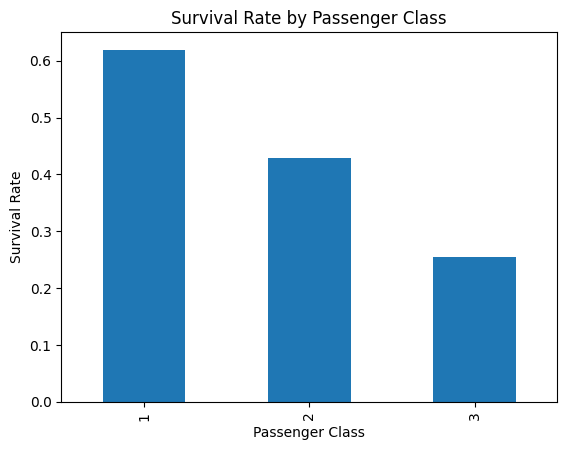

In [397]:
# สร้างกราฟแท่งเพื่อแสดงความสัมพันธ์ระหว่าง survived และ pclass
titanic.groupby('pclass')['survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [398]:
# สร้างตาราง Pivot Table เพื่อดูความสัมพันธ์ระหว่าง survived และ sex
pivot_table = pd.pivot_table(titanic, values='survived', index='sex', aggfunc=np.mean)
pivot_table

<ipython-input-398-1586e8dd7361>:2: FutureWarning: The provided callable <function mean at 0x7cf0dd703d90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(titanic, values='survived', index='sex', aggfunc=np.mean)


,survived
sex,
0,0.190985
1,0.727468


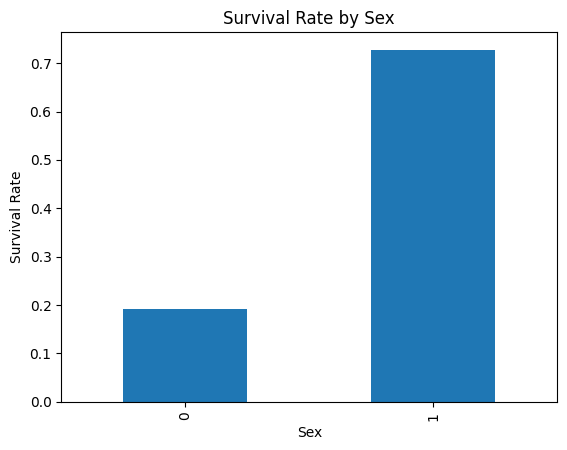

In [399]:
# สร้างกราฟแท่งเพื่อแสดงความสัมพันธ์ระหว่าง survived และ sex
titanic.groupby('sex')['survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

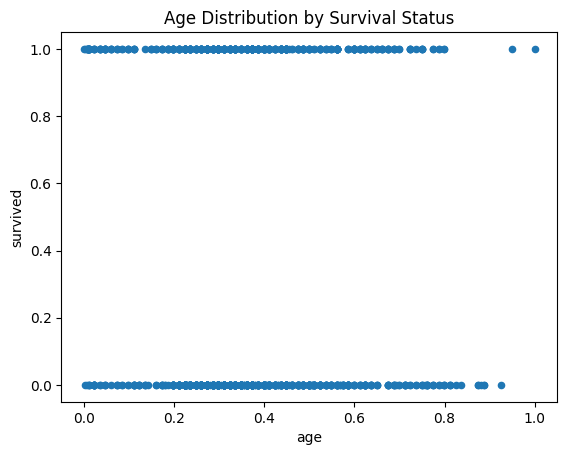

In [400]:
# สร้าง box plot เพื่อดูการกระจายตัวของอายุตามสถานะการรอดชีวิต
titanic.plot.scatter(x='age', y='survived')
plt.title('Age Distribution by Survival Status')
plt.show()

In [401]:
# สร้างตาราง Pivot Table เพื่อดูความสัมพันธ์ระหว่าง survived และ fare
pivot_table = pd.pivot_table(titanic, values='fare', index='survived',
                             aggfunc=np.mean)
pivot_table

<ipython-input-401-6a95582bdb3d>:2: FutureWarning: The provided callable <function mean at 0x7cf0dd703d90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(titanic, values='fare', index='survived',


,fare
survived,
0,0.045608
1,0.096347


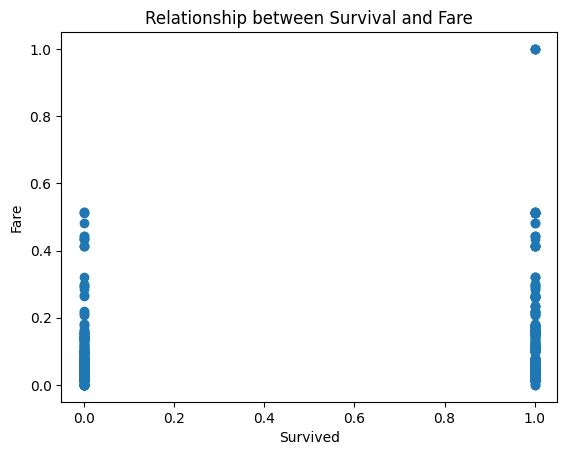

In [402]:
# สร้าง scatter plot เพื่อดูความสัมพันธ์ระหว่าง survived และ fare
plt.scatter(titanic['survived'], titanic['fare'])
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Relationship between Survival and Fare')
plt.show()

* (10 points) สร้างตารางสรุปข้อมูลเพื่อหาคุณลักษณะของผู้โดยสารเรือไททานิค และศึกษาเกี่ยวกับการเสียชีวิตของผู้โดยสาร ทำการสรุปผลที่ได้จากตาราง

In [403]:
titanic.pivot_table(index=['survived','sex'],values=['age','sibsp','parch','fare'],aggfunc=['mean','count'])

mean                               count                 
                   age      fare     parch     sibsp   age fare parch sibsp
survived sex                                                               
0        0    0.387914  0.045986  0.224340  0.426686   682  682   682   682
         1    0.328405  0.043574  0.889764  1.031496   127  127   127   127
1        0    0.341711  0.072588  0.347826  0.360248   161  161   161   161
         1    0.371496  0.107630  0.536873  0.510324   339  339   339   339

จากตารางสามารถสรุปได้ว่า

 - ผู้โดยสารหญิงมีอัตราการรอดชีวิตสูงกว่าผู้โดยสารชาย
 - ผู้โดยสารที่รอดชีวิตมีจำนวนญาติพี่น้องหรือคู่สมรสบนเรือ (Sibsp) และจำนวนพ่อแม่หรือลูก (Parch)น้อยกว่า ผู้โดยสารที่เสียชีวิต



In [404]:
titanic.pivot_table(index=['survived','pclass'],values=['age','sibsp','parch','fare'],aggfunc=['mean','count'])

mean                               count                 
                      age      fare     parch     sibsp   age fare parch sibsp
survived pclass                                                               
0        1       0.512411  0.137436  0.268293  0.317073   123  123   123   123
         2       0.410248  0.038650  0.126582  0.322785   158  158   158   158
         3       0.337915  0.026298  0.403409  0.628788   528  528   528   528
1        1       0.451022  0.191329  0.425000  0.510000   200  200   200   200
         2       0.311409  0.044909  0.689076  0.487395   119  119   119   119
         3       0.296633  0.025212  0.392265  0.392265   181  181   181   181

จากตารางสามารถสรุปได้ว่า
- ผู้โดยสารในชั้นที่ 1 มีอัตราการรอดชีวิตสูงกว่าผู้โดยสารในชั้นที่ 2 และ 3
- ผู้โดยสารที่เสียชีวิตส่วนใหญ่อยู่ในชั้นที่ 3

0

-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* ไฟล์ pdf ของ IPythonNotebook ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด